<a href="https://colab.research.google.com/github/AnanyaGarg51/IMBY--draft/blob/main/Cand2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/content/2.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print("\
Dataset Information:")
print(df.info())

# Display summary statistics
print("\
Summary Statistics:")
print(df.describe())

# Calculate the average scores for key metrics
avg_scores = df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].mean()
print("\
Average Scores:")
print(avg_scores)

   id  seek  start    end                                               text  \
0   0     0   0.00   4.32   Hello, I am Beside You. I am Cameron Barajas ...   
1   1     0   4.32  10.00   today. I recently completed my BBA in 2022. I...   
2   2     0  10.00  14.52   team and be a good team player according to t...   
3   3     0  14.52  20.06   who aims for perfection in the task and I alw...   
4   4     0  20.06  25.48   In summer 2022, I interned in a boutique inve...   

                                              tokens  temperature  \
0  [50364, 2425, 11, 286, 669, 8190, 482, 509, 13...          0.0   
1  [50580, 965, 13, 286, 3938, 7365, 452, 363, 92...          0.0   
2  [50864, 1469, 293, 312, 257, 665, 1469, 4256, ...          0.0   
3  [51090, 567, 24683, 337, 19708, 294, 264, 5633...          0.0   
4  [51367, 682, 4266, 20229, 11, 286, 2154, 292, ...          0.0   

   avg_logprob  compression_ratio  no_speech_prob  positive  negative  \
0    -0.268956           1.6666

Dataset Overview:
The dataset contains 19 entries with 18 columns, including various attributes related to the candidate's speech and sentiment analysis.

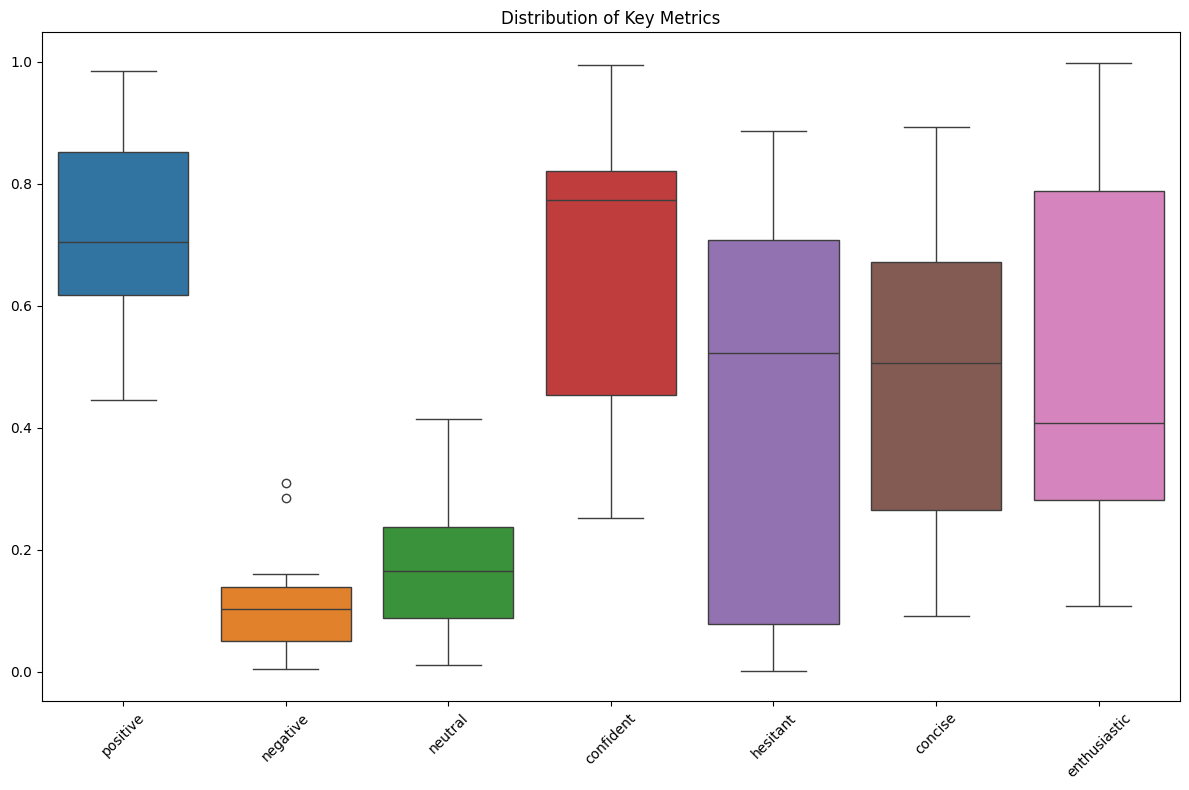

In [7]:
# Plot the distribution of key metrics
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']])
plt.title("Distribution of Key Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

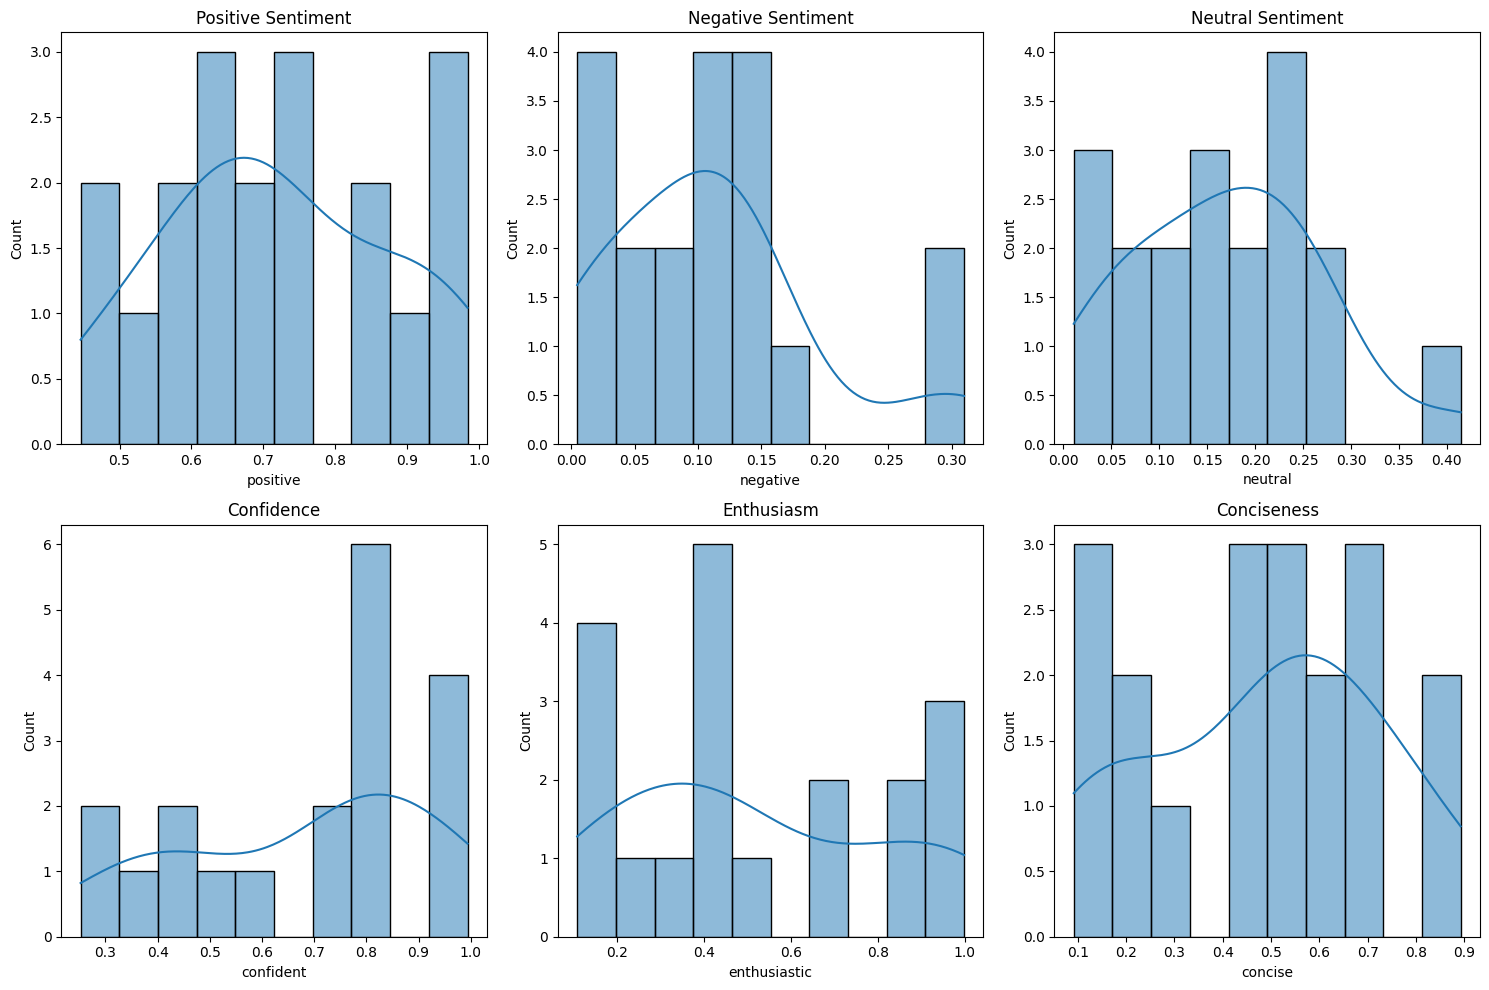

In [2]:
# Visualize the sentiment scores and other relevant attributes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot positive sentiment
sns.histplot(df['positive'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Positive Sentiment')

# Plot negative sentiment
sns.histplot(df['negative'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Negative Sentiment')

# Plot neutral sentiment
sns.histplot(df['neutral'], bins=10, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Neutral Sentiment')

# Plot confidence
sns.histplot(df['confident'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Confidence')

# Plot enthusiasm
sns.histplot(df['enthusiastic'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Enthusiasm')

# Plot conciseness
sns.histplot(df['concise'], bins=10, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Conciseness')

plt.tight_layout()
plt.show()

SENTIMENT ANALYSIS
Positive Sentiment: The histogram shows that the candidate's responses
are generally positive, with most values concentrated between 0.6 and 0.9. This suggests that the candidate expresses a positive attitude throughout the interview.

Negative Sentiment: The negative sentiment scores are very low, mostly below 0.2. This indicates that the candidate rarely expresses negative emotions or attitudes.

Neutral Sentiment: The neutral sentiment scores are also relatively low, mostly below 0.3, suggesting that the candidate's responses are more often emotionally charged (mostly positive) rather than neutral.

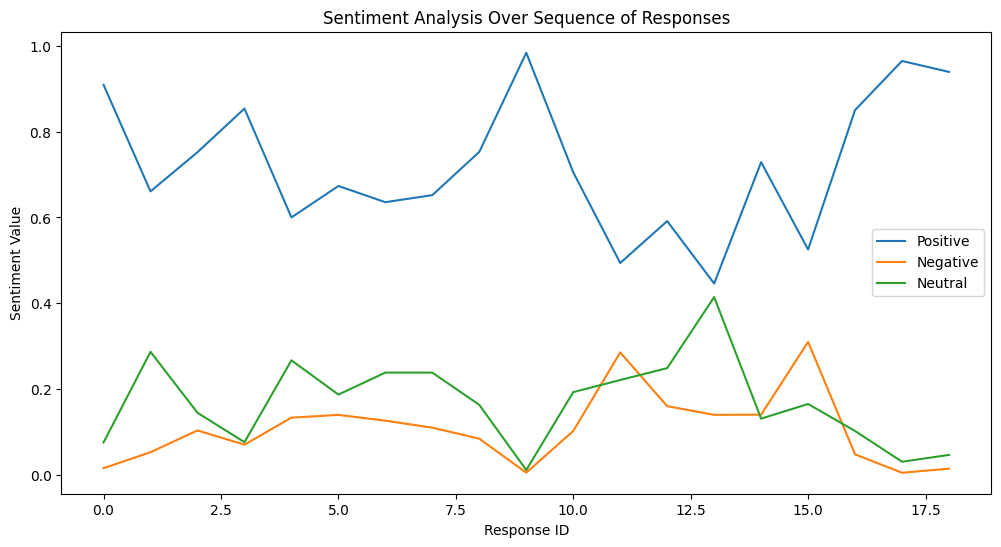

In [3]:
# Plot sentiment values against the sequence of responses (id)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot positive sentiment
sns.lineplot(x='id', y='positive', data=df, label='Positive', ax=ax)

# Plot negative sentiment
sns.lineplot(x='id', y='negative', data=df, label='Negative', ax=ax)

# Plot neutral sentiment
sns.lineplot(x='id', y='neutral', data=df, label='Neutral', ax=ax)

# Set plot title and labels
ax.set_title('Sentiment Analysis Over Sequence of Responses')
ax.set_xlabel('Response ID')
ax.set_ylabel('Sentiment Value')

# Show legend
ax.legend()

plt.show()

Confidence:
The confidence histogram shows a high concentration of values above 0.8, indicating that the candidate appears very confident in their responses. This could be a desirable trait for many positions.

Enthusiasm:
The enthusiasm scores are also quite high, with most values above 0.6. This suggests that the candidate shows a good level of enthusiasm during the interview, which is often a positive trait for employers.

Conciseness:
The conciseness scores are more spread out, but still tend towards the higher end (0.5-0.9). This indicates that the candidate is generally able to express themselves concisely, which can be a valuable skill in many roles.

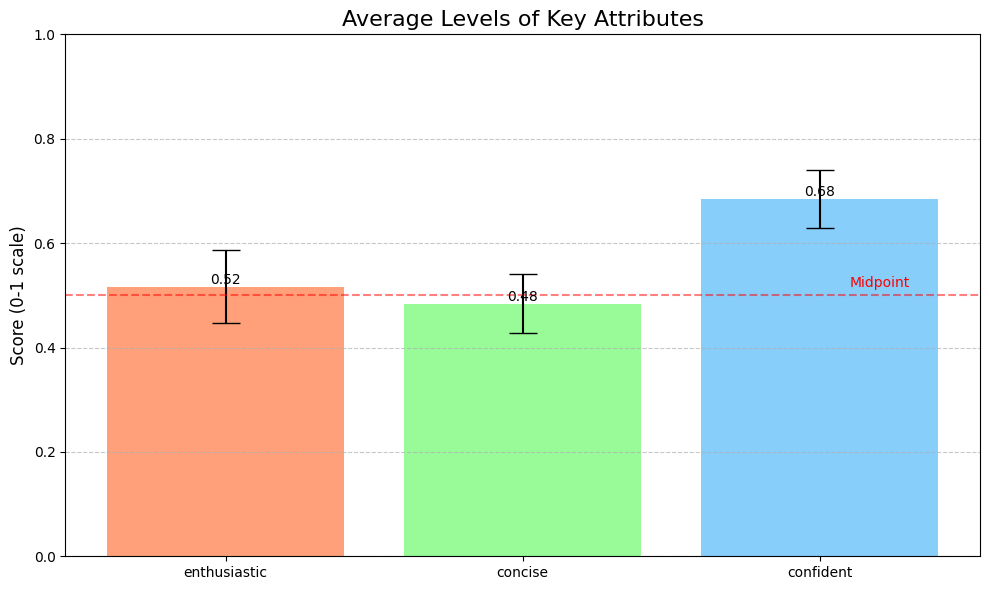

Mean Values:
enthusiastic    0.516685
concise         0.484221
confident       0.684879
dtype: float64
Standard Errors:
enthusiastic    0.070442
concise         0.056664
confident       0.054990
dtype: float64
Done


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the attributes we're interested in
attributes = ['enthusiastic', 'concise', 'confident']

# Calculate mean and standard error for each attribute
mean_values = df[attributes].mean()
se_values = df[attributes].sem()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(attributes, mean_values, yerr=se_values, capsize=10, color=['#FFA07A', '#98FB98', '#87CEFA'])

# Customize the plot
plt.title('Average Levels of Key Attributes', fontsize=16)
plt.ylabel('Score (0-1 scale)', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Add a horizontal line at 0.5 to indicate the midpoint
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
plt.text(2.1, 0.51, 'Midpoint', color='r', va='bottom', ha='left')

plt.tight_layout()
plt.show()

# Print the exact values for verification
print("Mean Values:")
print(mean_values)
print("\
Standard Errors:")
print(se_values)

print("\
Done")

Confidence: The candidate shows the highest level among the three attributes, with a score of approximately 0.68 on a 0-1 scale.

Enthusiasm: The candidate's enthusiasm score is about 0.52, which is slightly above the midpoint of the scale.

Conciseness: The conciseness score is approximately 0.48, which is just below the midpoint of the scale.


This data suggests that while the candidate shows above-average confidence, their enthusiasm and conciseness are more moderate.

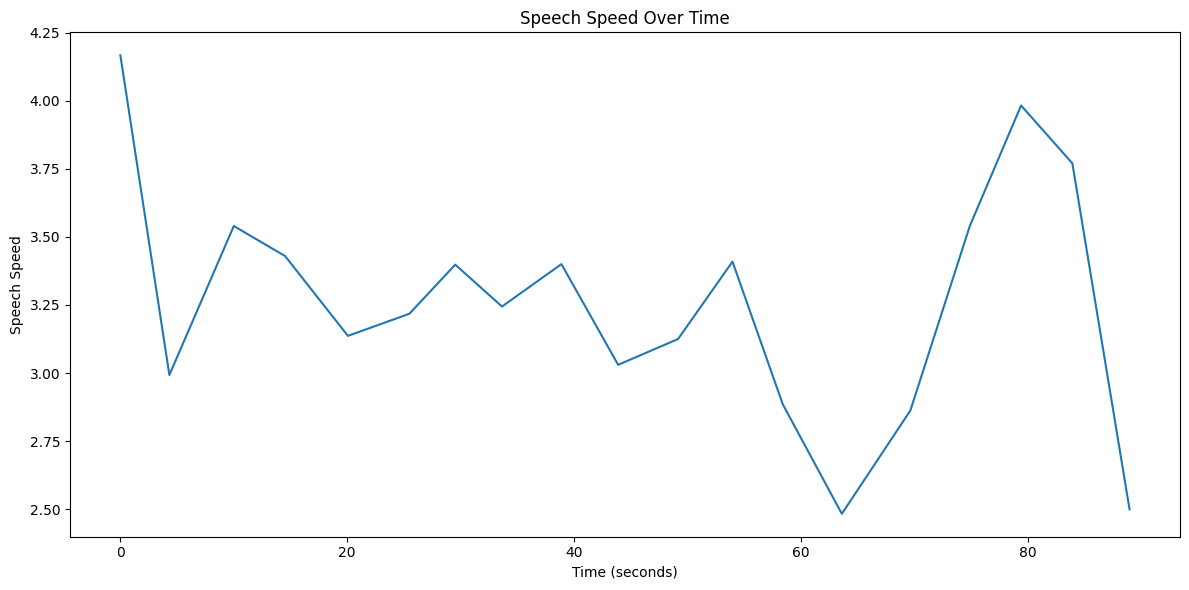

In [8]:
# Plot speech speed over time
plt.figure(figsize=(12, 6))
plt.plot(df['start'], df['speech_speed'])
plt.title("Speech Speed Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Speech Speed")
plt.tight_layout()
plt.show()

Speech Speed: From the summary statistics, we can see that the average speech speed is around 3.54 (assuming this is words per second or a similar metric). This suggests a moderate to fast speaking pace, which might indicate good verbal communication skills.

No Speech Probability: The average no_speech_prob is quite low (0.166), indicating that the candidate speaks clearly and consistently throughout the interview.